<a href="https://colab.research.google.com/github/rafacarmo/clustering-enem/blob/main/enem2018DadosSelecionadosKmeansStandardScaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aplicação do algoritmo k-means com StandardScaler

Instalação de pacote para exibição do tempo de execução de cada bloco de código

In [1]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 953 µs (started: 2022-11-07 13:27:56 +00:00)


Import de pacotes utilizados para clusterização e visualização

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

%matplotlib inline
label_encoder = LabelEncoder()

time: 3.3 s (started: 2022-11-07 13:27:56 +00:00)


Leitura do dataset

In [3]:
df2018 = pd.read_csv('/content/drive/MyDrive/ENEM/MICRODADOS_ENEM_2018.csv', 
                     encoding = 'ISO-8859-1', 
                     sep = ';')

time: 1min 59s (started: 2022-11-07 13:27:59 +00:00)


In [4]:
df2018.shape

(5513747, 137)

time: 3.61 ms (started: 2022-11-07 13:29:58 +00:00)


In [5]:
df2018.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180008202043,2018,5300108,Brasília,53,DF,44.0,M,1.0,1,...,A,A,A,A,A,A,A,A,B,A
1,180007197856,2018,2111102,São João dos Patos,21,MA,23.0,F,0.0,3,...,A,B,A,A,B,A,A,A,A,A
2,180008517434,2018,3530607,Mogi das Cruzes,35,SP,23.0,F,0.0,1,...,A,B,A,A,B,B,B,B,A,A
3,180007661228,2018,2916401,Itapetinga,29,BA,26.0,F,0.0,3,...,A,B,B,A,C,A,B,B,A,A
4,180008787987,2018,2918100,Jeremoabo,29,BA,20.0,M,0.0,0,...,A,B,A,A,B,A,B,B,B,A


time: 45.5 ms (started: 2022-11-07 13:29:58 +00:00)


Calcula média geral de notas

In [6]:
df2018.loc[:,'MEDIA_GERAL'] = (df2018['NU_NOTA_CN'] + 
                                 df2018['NU_NOTA_CH'] + 
                                 df2018['NU_NOTA_LC'] + 
                                 df2018['NU_NOTA_MT'] + 
                                 df2018['NU_NOTA_REDACAO']) / 5.0

time: 63.7 ms (started: 2022-11-07 13:29:58 +00:00)


Seleciona somente as colunas que serão usadas (seleção igual ao artigo de Alessandro Aparecido Barcellos)

In [7]:
df_filtrado = df2018[['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
               'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018',
               'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'SG_UF_RESIDENCIA', 'NU_IDADE', 
               'TP_SEXO', 'TP_COR_RACA', 'TP_DEPENDENCIA_ADM_ESC', 'MEDIA_GERAL']]

time: 1.88 s (started: 2022-11-07 13:29:58 +00:00)


In [8]:
df_filtrado.shape

(5513747, 31)

time: 4.29 ms (started: 2022-11-07 13:30:00 +00:00)


Remove estudantes que possuem qualquer atributo com valor nulo.

In [9]:
df_filtrado.dropna(axis=0, inplace=True)

time: 7.2 s (started: 2022-11-07 13:30:00 +00:00)


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [10]:
df_filtrado.shape

(1130660, 31)

time: 3.68 ms (started: 2022-11-07 13:30:07 +00:00)


In [11]:
df_filtrado.head()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,...,Q022,Q023,Q024,Q025,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA_ADM_ESC,MEDIA_GERAL
8,D,D,C,B,7,C,A,B,C,A,...,B,A,A,A,CE,19.0,M,3,2.0,417.16
16,C,C,F,B,5,B,A,B,C,A,...,C,A,A,A,CE,18.0,M,3,2.0,530.28
26,H,E,F,B,7,B,A,B,C,A,...,D,A,A,B,PB,18.0,F,1,2.0,541.90
29,B,A,A,A,5,B,A,B,C,A,...,B,A,A,A,PI,54.0,F,3,2.0,448.02
39,D,E,C,B,3,C,A,B,C,B,...,D,B,B,B,SP,17.0,F,1,2.0,473.72


time: 26.4 ms (started: 2022-11-07 13:30:07 +00:00)


Remove resposta "Não sei" do questionario Q001

In [12]:
df_filtrado.drop(df_filtrado.loc[df_filtrado['Q001'] == 'H'].index, inplace=True)

time: 511 ms (started: 2022-11-07 13:30:07 +00:00)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
df_filtrado.shape

(1025790, 31)

time: 4.98 ms (started: 2022-11-07 13:30:08 +00:00)


Remove resposta "Não sei" do questionario Q002

In [14]:
df_filtrado.drop(df_filtrado.loc[df_filtrado['Q002'] == 'H'].index, inplace=True)

time: 477 ms (started: 2022-11-07 13:30:08 +00:00)


Remove resposta "Não sei" do questionario Q003

In [15]:
df_filtrado.drop(df_filtrado.loc[df_filtrado['Q003'] == 'F'].index, inplace=True)

time: 507 ms (started: 2022-11-07 13:30:08 +00:00)


Remove resposta "Não sei" do questionario Q004

In [16]:
df_filtrado.drop(df_filtrado.loc[df_filtrado['Q004'] == 'F'].index, inplace=True)

time: 447 ms (started: 2022-11-07 13:30:09 +00:00)


In [17]:
df_filtrado.head()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,...,Q022,Q023,Q024,Q025,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA_ADM_ESC,MEDIA_GERAL
8,D,D,C,B,7,C,A,B,C,A,...,B,A,A,A,CE,19.0,M,3,2.0,417.16
29,B,A,A,A,5,B,A,B,C,A,...,B,A,A,A,PI,54.0,F,3,2.0,448.02
39,D,E,C,B,3,C,A,B,C,B,...,D,B,B,B,SP,17.0,F,1,2.0,473.72
41,D,E,C,C,3,E,A,B,C,A,...,C,A,A,B,MS,18.0,F,1,2.0,617.44
51,C,D,C,B,7,B,A,B,C,A,...,B,A,A,B,ES,17.0,M,2,2.0,456.38


time: 27.5 ms (started: 2022-11-07 13:30:09 +00:00)


In [18]:
df_filtrado.shape

(880680, 31)

time: 4.61 ms (started: 2022-11-07 13:30:09 +00:00)


Define função para tranformar os valores não numéricos em numéricos

In [19]:
df_tratado = df_filtrado.copy()

time: 96.1 ms (started: 2022-11-07 13:30:09 +00:00)


In [20]:
df_tratado.head()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,...,Q022,Q023,Q024,Q025,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA_ADM_ESC,MEDIA_GERAL
8,D,D,C,B,7,C,A,B,C,A,...,B,A,A,A,CE,19.0,M,3,2.0,417.16
29,B,A,A,A,5,B,A,B,C,A,...,B,A,A,A,PI,54.0,F,3,2.0,448.02
39,D,E,C,B,3,C,A,B,C,B,...,D,B,B,B,SP,17.0,F,1,2.0,473.72
41,D,E,C,C,3,E,A,B,C,A,...,C,A,A,B,MS,18.0,F,1,2.0,617.44
51,C,D,C,B,7,B,A,B,C,A,...,B,A,A,B,ES,17.0,M,2,2.0,456.38


time: 24.1 ms (started: 2022-11-07 13:30:10 +00:00)


In [21]:
dfsocioeconomicoemais = df_tratado[['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
               'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018',
               'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'SG_UF_RESIDENCIA', 'NU_IDADE', 
               'TP_SEXO', 'TP_COR_RACA', 'TP_DEPENDENCIA_ADM_ESC', 'MEDIA_GERAL']]
questionario = dfsocioeconomicoemais.values

time: 550 ms (started: 2022-11-07 13:30:10 +00:00)


In [22]:
questionario[:,0] = label_encoder.fit_transform(questionario[:,0])   # Q001
questionario[:,1] = label_encoder.fit_transform(questionario[:,1])   # Q002
questionario[:,2] = label_encoder.fit_transform(questionario[:,2])   # Q003
questionario[:,3] = label_encoder.fit_transform(questionario[:,3])   # Q004
# questionario2[:,4] = label_encoder.fit_transform(questionario[:,4]) # Q005 -> já está numérico
questionario[:,5] = label_encoder.fit_transform(questionario[:,5])   # Q006
questionario[:,6] = label_encoder.fit_transform(questionario[:,6])   # Q007
questionario[:,7] = label_encoder.fit_transform(questionario[:,7])   # Q008
questionario[:,8] = label_encoder.fit_transform(questionario[:,8])   # Q009
questionario[:,9] = label_encoder.fit_transform(questionario[:,9])   # Q010
questionario[:,10] = label_encoder.fit_transform(questionario[:,10]) # Q011
questionario[:,11] = label_encoder.fit_transform(questionario[:,11]) # Q012
questionario[:,12] = label_encoder.fit_transform(questionario[:,12]) # Q013
questionario[:,13] = label_encoder.fit_transform(questionario[:,13]) # Q014
questionario[:,14] = label_encoder.fit_transform(questionario[:,14]) # Q015
questionario[:,15] = label_encoder.fit_transform(questionario[:,15]) # Q016
questionario[:,16] = label_encoder.fit_transform(questionario[:,16]) # Q017
questionario[:,17] = label_encoder.fit_transform(questionario[:,17]) # Q018
questionario[:,18] = label_encoder.fit_transform(questionario[:,18]) # Q019
questionario[:,19] = label_encoder.fit_transform(questionario[:,19]) # Q020
questionario[:,20] = label_encoder.fit_transform(questionario[:,20]) # Q021
questionario[:,21] = label_encoder.fit_transform(questionario[:,21]) # Q022
questionario[:,22] = label_encoder.fit_transform(questionario[:,22]) # Q023
questionario[:,23] = label_encoder.fit_transform(questionario[:,23]) # Q024
questionario[:,24] = label_encoder.fit_transform(questionario[:,24]) # Q025
questionario[:,25] = label_encoder.fit_transform(questionario[:,25]) # SG_UF_RESIDENCIA
#questionario[:,26] = label_encoder.fit_transform(questionario[:,26]) # NU_IDADE > já está numérico
questionario[:,27] = label_encoder.fit_transform(questionario[:,27]) # TP_SEXO 
#questionario[:,28] = label_encoder.fit_transform(questionario[:,28]) # TP_COR_RACA -> já está numérico
#questionario[:,29] = label_encoder.fit_transform(questionario[:,29]) # TP_DEPENDENCIA_ADM_ESC -> já está numérico
#questionario[:,30] = label_encoder.fit_transform(questionario[:,30]) # MEDIA_GERAL
#questionario[:,30] = label_encoder.fit_transform(questionario[:,30]) # MEDIA_GERAL

time: 4.65 s (started: 2022-11-07 13:30:10 +00:00)


In [23]:
dfnumerico = pd.DataFrame(questionario)

time: 285 ms (started: 2022-11-07 13:30:15 +00:00)


In [24]:
dfnumerico.columns = ['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
               'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018',
               'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'SG_UF_RESIDENCIA', 'NU_IDADE', 
               'TP_SEXO', 'TP_COR_RACA', 'TP_DEPENDENCIA_ADM_ESC', 'MEDIA_GERAL']

time: 1.76 ms (started: 2022-11-07 13:30:15 +00:00)


In [25]:
dfnumerico.head()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,...,Q022,Q023,Q024,Q025,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA_ADM_ESC,MEDIA_GERAL
0,3,3,2,1,7,2,0,1,2,0,...,1,0,0,0,5,19.0,1,3,2.0,417.16
1,1,0,0,0,5,1,0,1,2,0,...,1,0,0,0,16,54.0,0,3,2.0,448.02
2,3,4,2,1,3,2,0,1,2,1,...,3,1,1,1,25,17.0,0,1,2.0,473.72
3,3,4,2,2,3,4,0,1,2,0,...,2,0,0,1,11,18.0,0,1,2.0,617.44
4,2,3,2,1,7,1,0,1,2,0,...,1,0,0,1,7,17.0,1,2,2.0,456.38


time: 21.7 ms (started: 2022-11-07 13:30:15 +00:00)


Aplica validação WSS para identificação do melhor número de clusters a serem gerados

1 6805229403.776553
2 2291331808.2016892
3 1177620548.5901394
4 751844748.458544
5 538860140.9524107
6 415651276.45564866
7 334965287.3918129
8 279938940.73892856
9 240456895.32439947
10 211896271.69263923


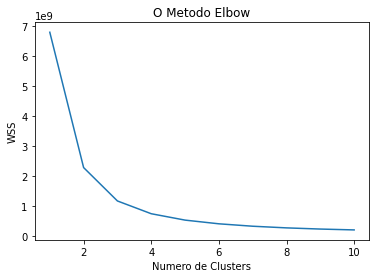

time: 5min 23s (started: 2022-11-07 13:30:15 +00:00)


In [26]:
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(dfnumerico.values)
    print(i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

Aplica StandardScaler

In [27]:
scaler = StandardScaler()
 
valuesStandardScaled = scaler.fit_transform(dfnumerico.values)
 
dfWithStandardScaler = pd.DataFrame(valuesStandardScaled)
dfWithStandardScaler.columns = ['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
               'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018',
               'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'SG_UF_RESIDENCIA', 'NU_IDADE', 
               'TP_SEXO', 'TP_COR_RACA', 'TP_DEPENDENCIA_ADM_ESC', 'MEDIA_GERAL']

time: 2.48 s (started: 2022-11-07 13:35:39 +00:00)


In [28]:
dfWithStandardScaler.head()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,...,Q022,Q023,Q024,Q025,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA_ADM_ESC,MEDIA_GERAL
0,-0.027885,-0.297369,0.216800,-0.501452,2.171919,-0.569372,-0.283151,-0.595493,-0.479909,-0.896991,...,-1.392712,-0.696936,-0.946009,-1.799295,-1.247307,0.349679,1.166333,0.906722,-0.481638,-1.323502
1,-1.291678,-2.242269,-1.411661,-1.342864,0.674300,-0.837261,-0.283151,-0.595493,-0.479909,-0.896991,...,-1.392712,-0.696936,-0.946009,-1.799295,0.180611,12.694131,-0.857388,0.906722,-0.481638,-0.970143
2,-0.027885,0.350931,0.216800,-0.501452,-0.823319,-0.569372,-0.283151,-0.595493,-0.479909,0.459176,...,0.426480,1.434851,0.239546,0.555773,1.348906,-0.355718,-0.857388,-1.038294,-0.481638,-0.675869
3,-0.027885,0.350931,0.216800,0.339959,-0.823319,-0.033596,-0.283151,-0.595493,-0.479909,-0.896991,...,-0.483116,-0.696936,-0.946009,0.555773,-0.468443,-0.003019,-0.857388,-1.038294,-0.481638,0.969779
4,-0.659782,-0.297369,0.216800,-0.501452,2.171919,-0.837261,-0.283151,-0.595493,-0.479909,-0.896991,...,-1.392712,-0.696936,-0.946009,0.555773,-0.987685,-0.355718,1.166333,-0.065786,-0.481638,-0.874418


time: 21.9 ms (started: 2022-11-07 13:35:41 +00:00)


Aplica validação WSS no dfWithStandardScaler

1 27301079.99999995
2 21842153.36657752
3 19950026.256004877
4 19124034.72980133
5 18596370.882386044
6 18135970.6509303
7 17639540.5164921
8 17336322.27873836
9 17018892.90387742
10 16606624.971880581


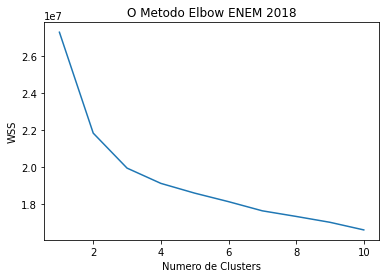

time: 4min 29s (started: 2022-11-07 13:35:42 +00:00)


In [29]:
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(dfWithStandardScaler.values)
    print(i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow ENEM 2018')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

Aplica o algoritmo k-means no dfWithStandardScaler

In [30]:
kmeans = KMeans(n_clusters= 3)

clusters_labels = kmeans.fit_predict(dfWithStandardScaler.values)
 
dfWithStandardScaler['clusters'] = clusters_labels

time: 10.2 s (started: 2022-11-07 13:40:11 +00:00)


Aplicar clusters no dataset "normal"

In [31]:
dfnumerico['clusters'] = dfWithStandardScaler['clusters']

time: 3.14 ms (started: 2022-11-07 13:40:21 +00:00)


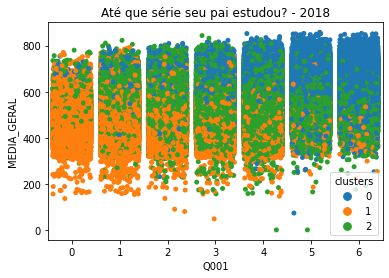

time: 37.4 s (started: 2022-11-07 13:40:21 +00:00)


In [32]:
sns.stripplot(x="Q001", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Até que série seu pai estudou? - 2018')
plt.show()

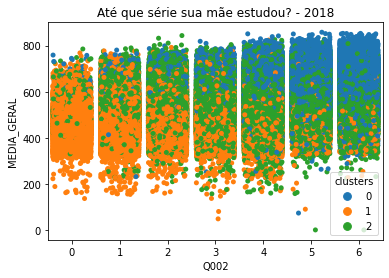

time: 36.6 s (started: 2022-11-07 13:40:59 +00:00)


In [33]:
sns.stripplot(x="Q002", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Até que série sua mãe estudou? - 2018')
plt.show()

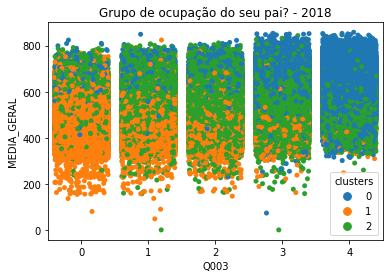

time: 36.3 s (started: 2022-11-07 13:41:35 +00:00)


In [34]:
sns.stripplot(x="Q003", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Grupo de ocupação do seu pai? - 2018')
plt.show()

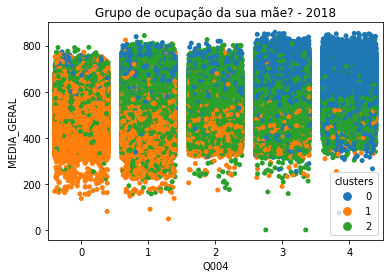

time: 36.2 s (started: 2022-11-07 13:42:12 +00:00)


In [35]:
sns.stripplot(x="Q004", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Grupo de ocupação da sua mãe? - 2018')
plt.show()

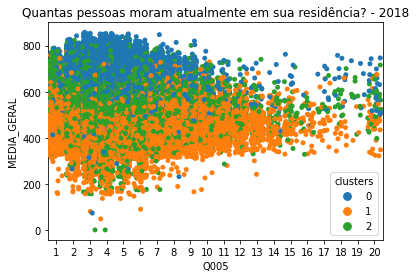

time: 24.7 s (started: 2022-11-07 13:42:48 +00:00)


In [36]:
sns.stripplot(x="Q005", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Quantas pessoas moram atualmente em sua residência? - 2018')
plt.show()

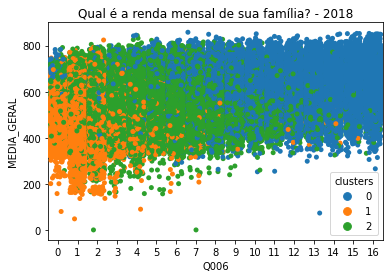

time: 23.3 s (started: 2022-11-07 13:43:13 +00:00)


In [37]:
sns.stripplot(x="Q006", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Qual é a renda mensal de sua família? - 2018')
plt.show()

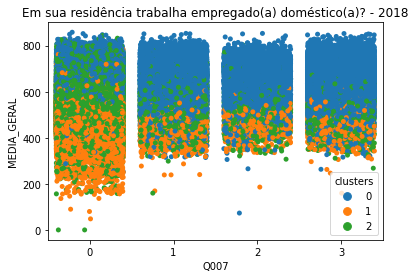

time: 36.5 s (started: 2022-11-07 13:43:36 +00:00)


In [38]:
sns.stripplot(x="Q007", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Em sua residência trabalha empregado(a) doméstico(a)? - 2018')
plt.show()

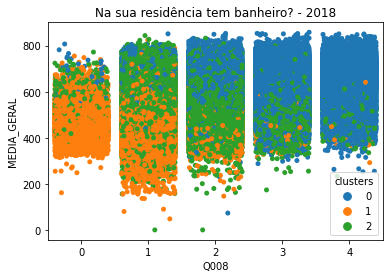

time: 36.1 s (started: 2022-11-07 13:44:12 +00:00)


In [39]:
sns.stripplot(x="Q008", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem banheiro? - 2018')
plt.show()

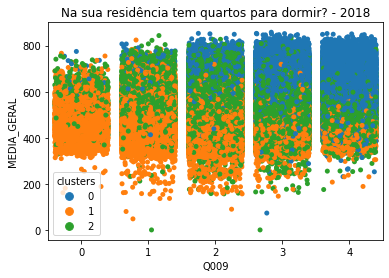

time: 36 s (started: 2022-11-07 13:44:49 +00:00)


In [40]:
sns.stripplot(x="Q009", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem quartos para dormir? - 2018')
plt.show()

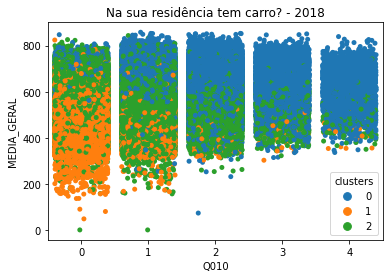

time: 21.7 s (started: 2022-11-07 13:45:25 +00:00)


In [41]:
sns.stripplot(x="Q010", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem carro? - 2018')
plt.show()

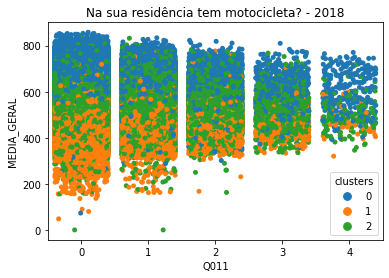

time: 21.6 s (started: 2022-11-07 13:45:46 +00:00)


In [42]:
sns.stripplot(x="Q011", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem motocicleta? - 2018')
plt.show()

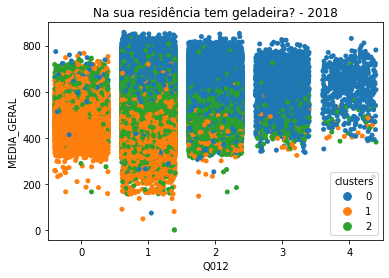

time: 40.9 s (started: 2022-11-07 13:46:08 +00:00)


In [43]:
sns.stripplot(x="Q012", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem geladeira? - 2018')
plt.show()

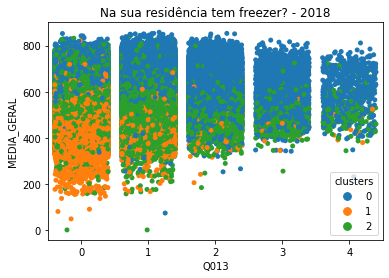

time: 37.6 s (started: 2022-11-07 13:46:49 +00:00)


In [44]:
sns.stripplot(x="Q013", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem freezer? - 2018')
plt.show()

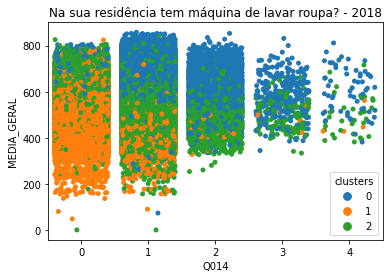

time: 21.7 s (started: 2022-11-07 13:47:26 +00:00)


In [45]:
sns.stripplot(x="Q014", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem máquina de lavar roupa? - 2018')
plt.show()

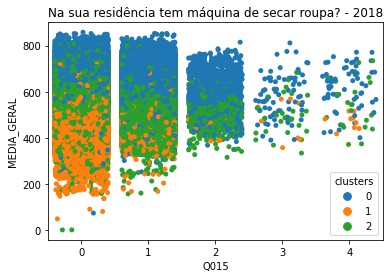

time: 21.7 s (started: 2022-11-07 13:47:48 +00:00)


In [46]:
sns.stripplot(x="Q015", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem máquina de secar roupa? - 2018')
plt.show()

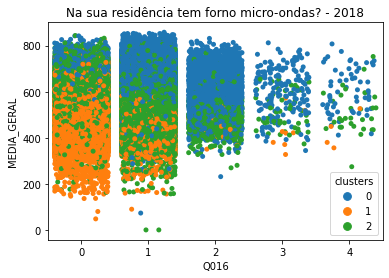

time: 21.5 s (started: 2022-11-07 13:48:10 +00:00)


In [47]:
sns.stripplot(x="Q016", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem forno micro-ondas? - 2018')
plt.show()

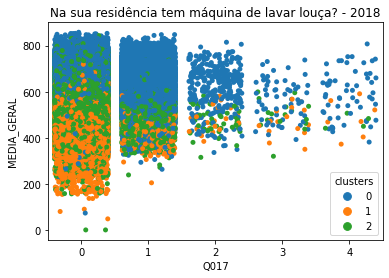

time: 21.5 s (started: 2022-11-07 13:48:31 +00:00)


In [48]:
sns.stripplot(x="Q017", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem máquina de lavar louça? - 2018')
plt.show()

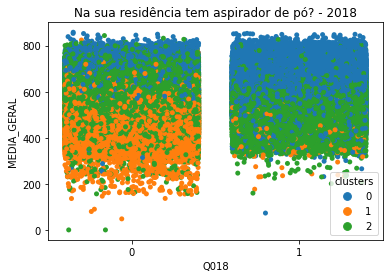

time: 34.9 s (started: 2022-11-07 13:48:53 +00:00)


In [49]:
sns.stripplot(x="Q018", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem aspirador de pó? - 2018')
plt.show()

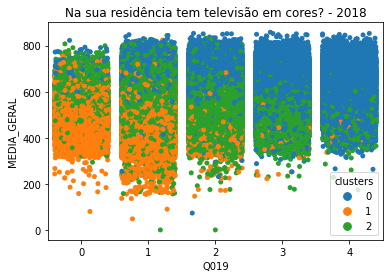

time: 35.4 s (started: 2022-11-07 13:49:28 +00:00)


In [50]:
sns.stripplot(x="Q019", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem televisão em cores? - 2018')
plt.show()

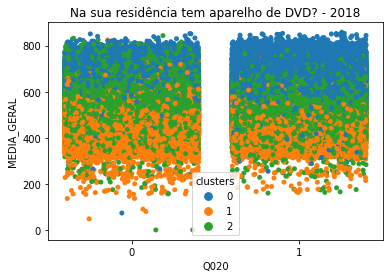

time: 34.6 s (started: 2022-11-07 13:50:03 +00:00)


In [51]:
sns.stripplot(x="Q020", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem aparelho de DVD? - 2018')
plt.show()

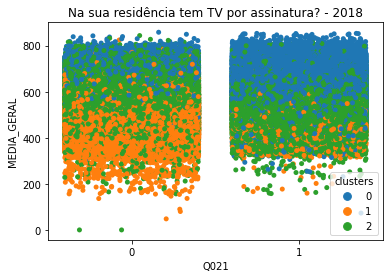

time: 35.1 s (started: 2022-11-07 13:50:38 +00:00)


In [52]:
sns.stripplot(x="Q021", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem TV por assinatura? - 2018')
plt.show()

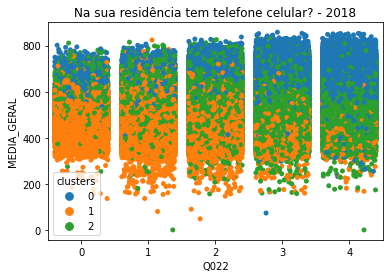

time: 35.3 s (started: 2022-11-07 13:51:13 +00:00)


In [53]:
sns.stripplot(x="Q022", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem telefone celular? - 2018')
plt.show()

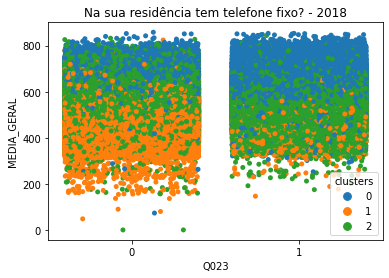

time: 34.2 s (started: 2022-11-07 13:51:48 +00:00)


In [54]:
sns.stripplot(x="Q023", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem telefone fixo? - 2018')
plt.show()

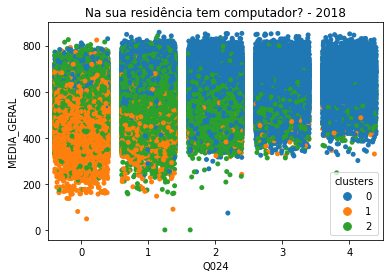

time: 35.3 s (started: 2022-11-07 13:52:22 +00:00)


In [55]:
sns.stripplot(x="Q024", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem computador? - 2018')
plt.show()

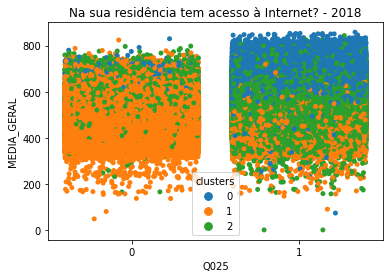

time: 34.2 s (started: 2022-11-07 13:52:58 +00:00)


In [56]:
sns.stripplot(x="Q025", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem acesso à Internet? - 2018')
plt.show()

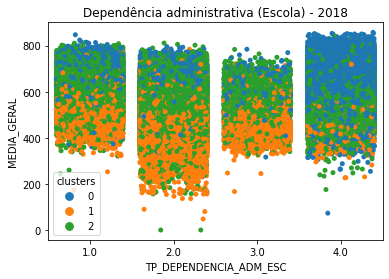

time: 34.8 s (started: 2022-11-07 13:53:32 +00:00)


In [57]:
sns.stripplot(x="TP_DEPENDENCIA_ADM_ESC", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Dependência administrativa (Escola) - 2018')
plt.show()

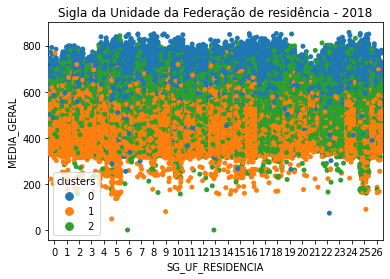

time: 38.9 s (started: 2022-11-07 13:54:07 +00:00)


In [58]:
sns.stripplot(x="SG_UF_RESIDENCIA", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Sigla da Unidade da Federação de residência - 2018')
plt.show()

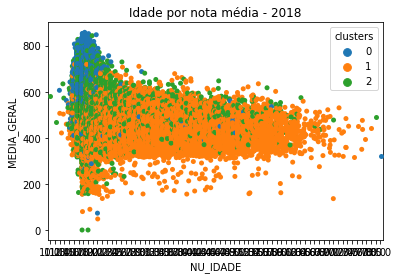

time: 38.5 s (started: 2022-11-07 13:54:46 +00:00)


In [59]:
sns.stripplot(x="NU_IDADE", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Idade por nota média - 2018')
plt.show()

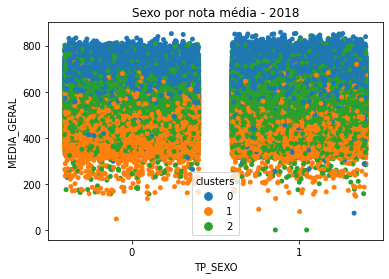

time: 34 s (started: 2022-11-07 13:55:24 +00:00)


In [60]:
sns.stripplot(x="TP_SEXO", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Sexo por nota média - 2018')
plt.show()

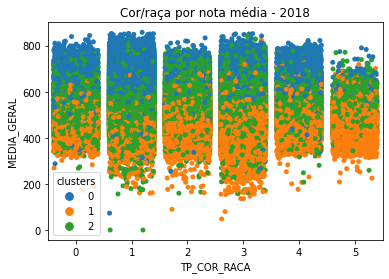

time: 35.3 s (started: 2022-11-07 13:55:58 +00:00)


In [61]:
sns.stripplot(x="TP_COR_RACA", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Cor/raça por nota média - 2018')
plt.show()

PCA

In [62]:
#from sklearn.decomposition import PCA

time: 539 µs (started: 2022-11-07 13:56:34 +00:00)


In [63]:
#df = dfnumerico.copy()
#dfpca = df.drop('MEDIA_GERAL', 1)
#dfpca = dfpca.drop('clusters', 1)

time: 1.3 ms (started: 2022-11-07 13:56:34 +00:00)


In [64]:
#reduced_data = PCA(n_components=1).fit_transform(dfpca)
#results = pd.DataFrame(reduced_data,columns=['pca1'])
#results['MEDIA_GERAL'] = df['MEDIA_GERAL']
#results['clusters'] = df['clusters']

#sns.stripplot(x="pca1", y="MEDIA_GERAL", hue=results['clusters'], data=results)
#plt.title('K-means Clustering com 2 dimensões')
#plt.show()

time: 1.23 ms (started: 2022-11-07 13:56:34 +00:00)
